Student Name: Chi Nguyen


Machine Learning for Public Policy


HW3 - Applying a machine learning pipeline to the donors dataset


Pipeline codes are in the files preprocess.py and build_models.py

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import numpy as np
import preprocess
import build_models
import mlhelperfunctions

In [2]:
donors = preprocess.import_csv("projects_2012_2013.csv")
donors.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [3]:
preprocess.explore_data(donors)

Let's take a look at the first 10 lines of the dataframe!

                          projectid                    teacher_acctid  \
0  00001ccc0e81598c4bd86bacb94d7acb  96963218e74e10c3764a5cfb153e6fea   
1  0000fa3aa8f6649abab23615b546016d  2a578595fe351e7fce057e048c409b18   
2  000134f07d4b30140d63262c871748ff  26bd60377bdbffb53a644a16c5308e82   
3  0001f2d0b3827bba67cdbeaa248b832d  15d900805d9d716c051c671827109f45   
4  0004536db996ba697ca72c9e058bfe69  400f8b82bb0143f6a40b217a517fe311   
5  00049ec8ca1f2d08cb13cab31b0b85ec  7149611553c700de9a6099f8a9ce598b   
6  0004d2fdbb571237fa53a97e7691440b  926671e209fb977bd5123145c1848ad1   
7  0004ee26667e751dd51384eb9f30c72e  abe4dabb7864f4c548d230cf9070e03f   
8  0006a31d45f8d52d217e7c5b55c11f37  3b5fada1ad0e339acc669829071320c4   
9  0008ac907bf237a15a959244205d3ee5  92527a5ac5fe946ed1961fb2e1de8cc5   

                           schoolid  school_ncesid  school_latitude  \
0  9f3f9f2c2da7edda5648ccd10554ed8c   1.709930e+11        41.80765

In [4]:
preprocess.pre_process(donors)

Brief overview of the number of missingobservations for each column:

secondary_focus_area                      40556
secondary_focus_subject                   40556
school_metro                              15224
school_ncesid                              9233
school_district                             172
students_reached                             59
resource_type                                17
primary_focus_area                           15
primary_focus_subject                        15
grade_level                                   3
schoolid                                      0
teacher_acctid                                0
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
datefullyfunded                               0
school_magnet                                 0
school_county                                 0
school_charter    

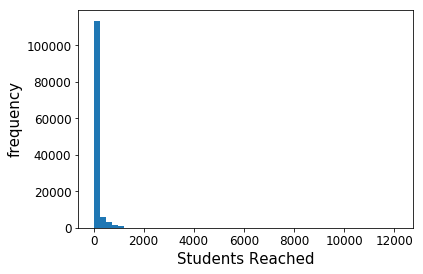

In [5]:
preprocess.create_hist(donors, 'students_reached', 'Students Reached', 
                       'frequency', "Histogram of number of students reached")

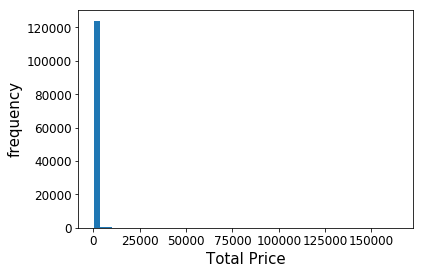

In [6]:
preprocess.create_hist(donors, 'total_price_including_optional_support', 'Total Price', 
                       'frequency', "Histogram of total price")

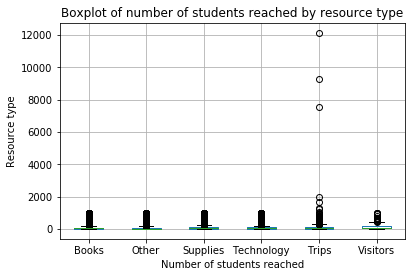

In [7]:
preprocess.create_boxplot(donors, 'students_reached', 'resource_type', 
                          'Number of students reached', 'Resource type',
                          'Boxplot of number of students reached by resource type')

In [8]:
geometry = [Point(xy) for xy in zip(donors['school_longitude'], donors['school_latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(donors, crs=crs, geometry = geometry)
geo_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,geometry
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13,POINT (-87.67325699999999 41.807654)
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12,POINT (-119.296596 34.296596)
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12,POINT (-118.257834 34.078625)
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12,POINT (-73.98821700000001 40.687286)
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13,POINT (-73.205635 40.793018)


In [9]:
donors['students_reached'].corr(donors['total_price_including_optional_support'])

0.1766413409817781

In [10]:
cols_to_transform_to_datetime = ['date_posted', 'datefullyfunded']
preprocess.convert_to_datetime(donors, cols_to_transform_to_datetime)
donors.dtypes

projectid                                         object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                    float64
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
teacher_prefix                                    object
primary_focus_subject                             object
primary_focus_area                                object
secondary_focus_subject                           object
secondary_focus_area           

In [11]:
preprocess.convert_to_categorical_using_qcut(donors, 'students_reached',
                                             'students_reached_group', 3, 
                                             ['low', 'medium', 'high'])
preprocess.convert_to_categorical_using_qcut(donors, 'total_price_including_optional_support',
                                             'price_group', 3, 
                                             ['low', 'medium', 'high'])

In [12]:
cols_to_transform_to_binary = ['school_state', 'school_metro',
                               'school_charter', 'school_magnet',
                               'primary_focus_subject', 'resource_type',
                               'poverty_level', 'grade_level', 'students_reached_group', 'price_group']
donors = preprocess.convert_to_binary(donors, cols_to_transform_to_binary)

In [13]:
donors['time_to_fund'] = donors['datefullyfunded'] - donors['date_posted']
donors['fund_within_60'] = np.where(donors['time_to_fund'] <= pd.to_timedelta(60, unit='D'), 1, 0)

In [14]:
l = donors.columns.tolist()
selected_features = l[19:134]
selected_features

['school_state_AK',
 'school_state_AL',
 'school_state_AR',
 'school_state_AZ',
 'school_state_CA',
 'school_state_CO',
 'school_state_CT',
 'school_state_DC',
 'school_state_DE',
 'school_state_FL',
 'school_state_GA',
 'school_state_HI',
 'school_state_IA',
 'school_state_ID',
 'school_state_IL',
 'school_state_IN',
 'school_state_KS',
 'school_state_KY',
 'school_state_LA',
 'school_state_MA',
 'school_state_MD',
 'school_state_ME',
 'school_state_MI',
 'school_state_MN',
 'school_state_MO',
 'school_state_MS',
 'school_state_MT',
 'school_state_NC',
 'school_state_ND',
 'school_state_NE',
 'school_state_NH',
 'school_state_NJ',
 'school_state_NM',
 'school_state_NV',
 'school_state_NY',
 'school_state_OH',
 'school_state_OK',
 'school_state_OR',
 'school_state_PA',
 'school_state_RI',
 'school_state_SC',
 'school_state_SD',
 'school_state_TN',
 'school_state_TX',
 'school_state_UT',
 'school_state_VA',
 'school_state_VT',
 'school_state_WA',
 'school_state_WI',
 'school_state_WV',


In [19]:
grid_size = 'test'
clfs, grid = mlhelperfunctions.define_clfs_params(grid_size)
models_to_run = [''DT', 'RF', 'AB', 'LR', 'GB'']
clean_df = donors
predictors = selected_features
outcome = 'fund_within_60'
date_col = 'date_posted'
prediction_windows = [6]
start_time = '2012-01-01'
end_time = '2013-12-31'

In [ ]:
results_df = build_models.clf_loop_cross_validation(models_to_run, clfs, grid, clean_df, predictors, outcome,
                                                    date_col, prediction_windows, start_time, end_time)
results_df

SVM
